<a href="https://colab.research.google.com/github/alimqa/industry/blob/main/IoT_MQTT_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install paho-mqtt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.8 MB/s eta 0:00:00


In [11]:
import paho.mqtt.client as mqtt
import random
import time
import json

broker = "broker.hivemq.com"
topic = "iot/student/sensor"

client = mqtt.Client()
client.connect(broker, 1883, 60)

for i in range(20):
    data = {
        "temperature": round(random.uniform(20, 30), 2),
        "humidity": round(random.uniform(40, 60), 2),
        "timestamp": time.time()
    }
    client.publish(topic, json.dumps(data))
    print("Published:", data)
    time.sleep(2)

client.disconnect()



/tmp/ipython-input-2705423502.py:9: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Published: {'temperature': 27.8, 'humidity': 54.18, 'timestamp': 1767947916.7867064}
Received: {'temperature': 27.8, 'humidity': 54.18, 'timestamp': 1767947916.7867064}
Received: {'temperature': 27.8, 'humidity': 54.18, 'timestamp': 1767947916.7867064}
Published: {'temperature': 20.78, 'humidity': 41.23, 'timestamp': 1767947918.7870471}
Received: {'temperature': 20.78, 'humidity': 41.23, 'timestamp': 1767947918.7870471}
Received: {'temperature': 20.78, 'humidity': 41.23, 'timestamp': 1767947918.7870471}
Published: {'temperature': 21.2, 'humidity': 52.25, 'timestamp': 1767947920.787617}
Received: {'temperature': 21.2, 'humidity': 52.25, 'timestamp': 1767947920.787617}
Received: {'temperature': 21.2, 'humidity': 52.25, 'timestamp': 1767947920.787617}
Published: {'temperature': 22.89, 'humidity': 54.55, 'timestamp': 1767947922.7880962}
Received: {'temperature': 22.89, 'humidity': 54.55, 'timestamp': 1767947922.7880962}
Received: {'temperature': 22.89, 'humidity': 54.55, 'timestamp': 17679

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [9]:
import csv

with open("sensor_data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Time", "Temperature", "Humidity"])


In [10]:
import paho.mqtt.client as mqtt
import json
import csv
from datetime import datetime

broker = "broker.hivemq.com"
topic = "iot/student/sensor"

def on_message(client, userdata, msg):
    data = json.loads(msg.payload.decode())
    with open("sensor_data.csv", "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow([
            datetime.now(),
            data["temperature"],
            data["humidity"]
        ])
    print("Received:", data)

client = mqtt.Client()
client.connect(broker, 1883, 60)
client.subscribe(topic)
client.on_message = on_message

client.loop_start()


/tmp/ipython-input-2213029506.py:20: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [12]:
import pandas as pd

df = pd.read_csv("sensor_data.csv")
df.head()


,Time,Temperature,Humidity
0,2026-01-09 08:38:37.646000,27.80,54.18
1,2026-01-09 08:38:37.647417,27.80,54.18
2,2026-01-09 08:38:38.897330,20.78,41.23
3,2026-01-09 08:38:38.897666,20.78,41.23
4,2026-01-09 08:38:40.897629,21.20,52.25


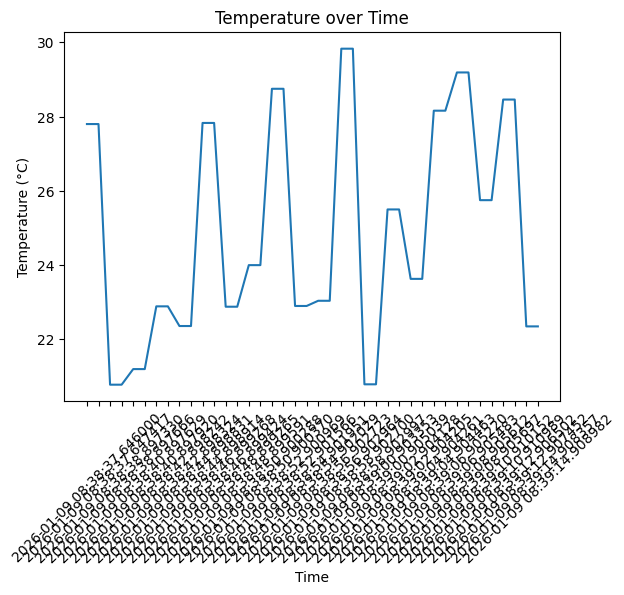

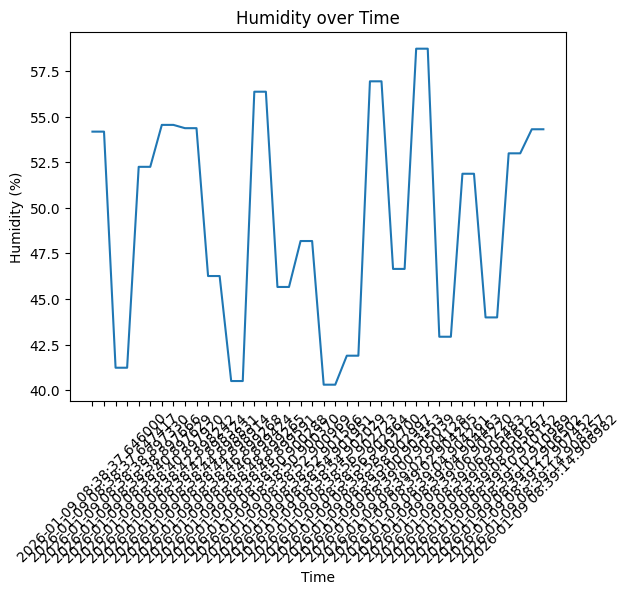

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["Time"], df["Temperature"])
plt.title("Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.plot(df["Time"], df["Humidity"])
plt.title("Humidity over Time")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.show()
